This notebook shows how to use the output from VASP DFPT calculation and the phonopy interface to plot the phonon bandstructure and density of states.

**Author**: Kiran Mathew

In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19 phonopy

In [ ]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pymatgen.core as pmg
from phonopy import Phonopy
from phonopy.structure.atoms import Atoms as PhonopyAtoms
from pymatgen.io.vasp.outputs import Vasprun

%matplotlib inline

warnings.filterwarnings("ignore", category=UserWarning, module="pymatgen")

plt.rc("font", size=16)
plt.rc("figure", dpi=150, titlesize=18)
plt.rcParams["figure.constrained_layout.use"] = True

Set the structure

In [ ]:
Si_primitive = PhonopyAtoms(
    symbols=["Si"] * 2,
    scaled_positions=[(0, 0, 0), (0.75, 0.5, 0.75)],
    cell=[
        [3.867422, 0.000000, 0.000000],
        [1.933711, 3.349287, 0.000000],
        [-0.000000, -2.232856, 3.157737],
    ],
)

# supercell size
scell = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]

Result from VASP DFPT calculations using the supercell structure

In [ ]:
pmg_test_files_dir = os.path.join(
    os.path.dirname(pmg.__file__), "..", "..", "test_files"
)

vasp_run = Vasprun(os.path.join(pmg_test_files_dir, "vasprun.xml.dfpt.phonon"))

Initialize phonopy and set the force constants obtained from VASP

In [ ]:
phonon = Phonopy(Si_primitive, scell)

# negative sign to ensure consistency with phonopy convention
phonon.set_force_constants(-vasp_run.force_constants)

Define the paths for plotting the bandstructure and set them in phonopy

In [ ]:
path_1 = np.linspace((0.5, 0.5, 0), (0, 0, 0), 51)
path_2 = np.linspace((0, 0, 0), (0.5, 0, 0), 51)

phonon.set_band_structure([path_1, path_2])

/Users/janosh/.venv/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


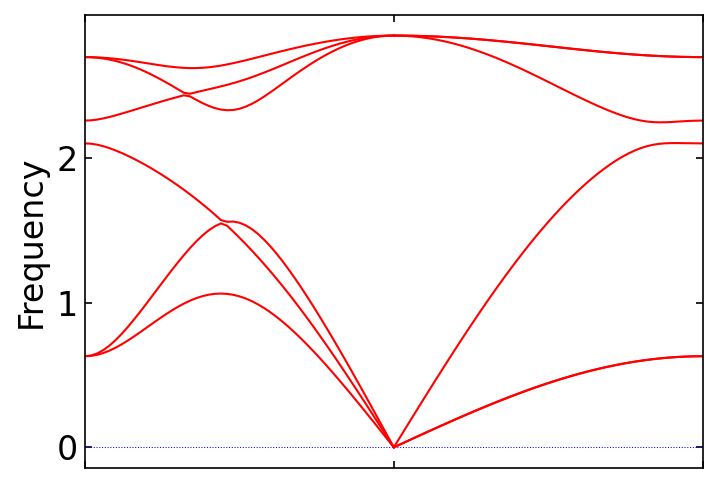

In [ ]:
phonon.plot_band_structure().show()

Set the mesh in reciprocal space and plot DOS

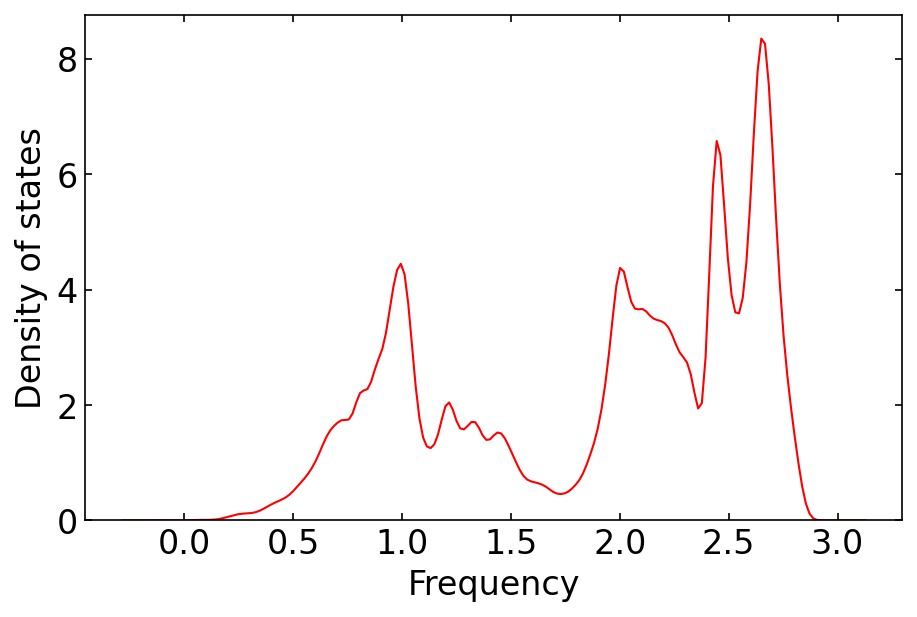

In [ ]:
mesh = [31, 31, 31]
phonon.set_mesh(mesh)

phonon.set_total_DOS()
phonon.plot_total_DOS().show()